In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
dataset = pd.read_csv('xclara.csv',header = 0)

In [3]:
print(dataset.head())

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


In [4]:
v1 = dataset.iloc[:,0].values
v2 = dataset.iloc[:,1].values

In [5]:
print(v1,v2)

[ 2.072345 17.93671   1.083576 ... 64.46532  90.72282  64.87976 ] [ -3.241693  15.78481    7.319176 ... -10.50136  -12.25584  -24.87731 ]


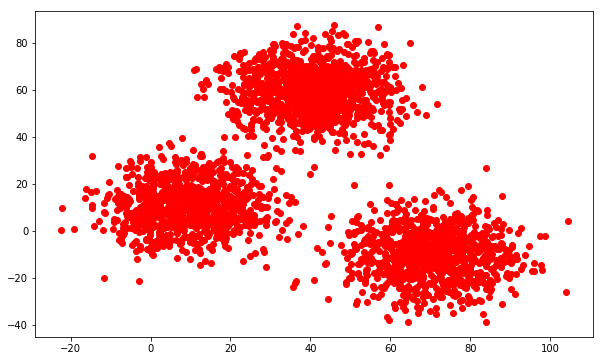

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(v1,v2,color='red')

In [7]:
X = dataset.iloc[:,0:2].values

In [8]:
print(X.shape[0])

3000


In [9]:
def dist(X,Y):
    distance = 0
    for i in range(len(X)):
        distance+=((X[i]-Y[i])**2)
    return np.sqrt(distance)

In [10]:
def dist2(X,Y):
    distance = 0
    distances = []
    for i in range(len(X)):
        for j in range(len(X[i])):
            distance+=((X[i][j]-Y[i][j])**2)
        distances.append(distance)
    return np.mean(distances)

# -----------------------------------Testing The Code-------------------------------------------

In [11]:
c = []
k=3
for i in range(k):
    index = np.random.randint(0,X.shape[0])
    c.append(X[index])
        
c_old = np.zeros((k,X.shape[1]))
cluster = np.zeros((X.shape[0],1))
error = dist2(c,c_old)
i = 0

In [12]:
for row in X:
    distances=[]               
    for j in range(k):
        distance = dist(row,c[j])
        distances.append(distance)
        cluster[i][0] = np.argmin(distances)
    i+=1

In [13]:
X_clusters=[]
for j in range(k):
    X_cluster = [X[i] for i in range(X.shape[0]) if cluster[i][0] == j]
    X_clusters.append(X_cluster)
        
c_old = deepcopy(c) 
print(c)
for i in range(k):
    c[i] = np.mean(X_clusters[i],axis=0)
    print(c[i])
print(c)
print(c_old)
error = dist2(c,c_old)
print(error)

[array([59.91527 , -4.502811]), array([ 63.89614, -19.10272]), array([-1.871265,  8.60885 ])]
[56.82287711 30.51543305]
[ 72.02626904 -17.92171943]
[18.48237689 30.97880812]
[array([56.82287711, 30.51543305]), array([ 72.02626904, -17.92171943]), array([18.48237689, 30.97880812])]
[array([59.91527 , -4.502811]), array([ 63.89614, -19.10272]), array([-1.871265,  8.60885 ])]
1585.7314053312211


# ---------------------------- Testing Till Here ------------------------------

# K-Means Method

In [32]:
def kmeans(k,epsilon,X):
    c = []
    for i in range(k):
        index = np.random.randint(0,X.shape[0])
        c.append(X[index])
        
    c_old = np.zeros((k,X.shape[1]))
    cluster = np.zeros((X.shape[0],1))
    error = dist2(c,c_old)
    
    while error>epsilon:  
        i = 0
        for row in X:
            distances=[]               
            for j in range(k):
                distance = dist(row,c[j])
                distances.append(distance)
            cluster[i][0] = np.argmin(distances)
            i+=1
            
        X_clusters=[]
        
        for j in range(k):
            X_cluster = [X[i] for i in range(X.shape[0]) if cluster[i][0] == j]
            X_clusters.append(X_cluster)
        
        c_old = deepcopy(c) 
        
        for i in range(k):
            c[i] = np.mean(X_clusters[i],axis=0)
        
        
        error = dist2(c,c_old)
        plt.figure(figsize=(10,6))
        plt.scatter(v1,v2,c=cluster.flatten())
        c_x = [c[i][0] for i in range(k)]
        c_y = [c[i][1] for i in range(k)]
        plt.scatter(c_x,c_y,marker='*',color='red')
    
    return c,cluster 

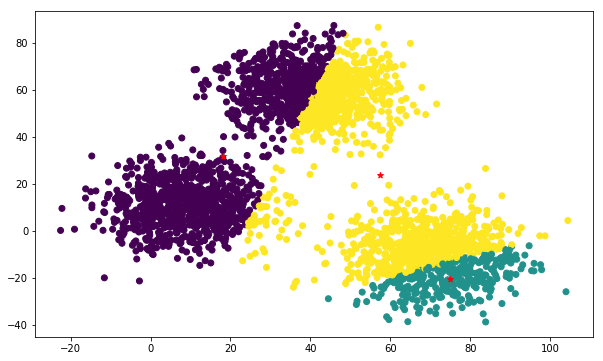

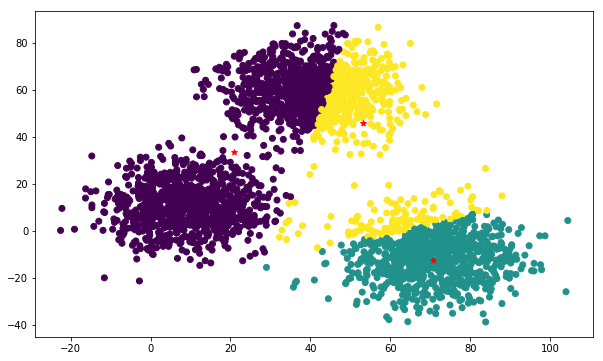

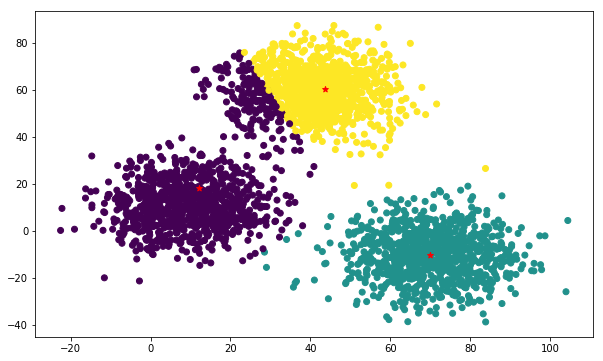

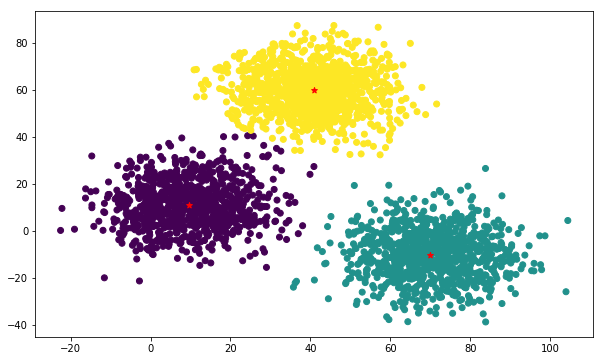

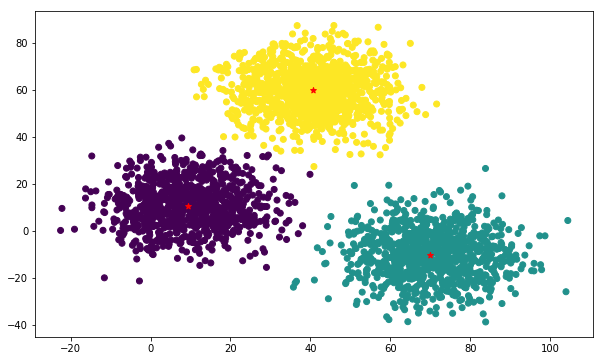

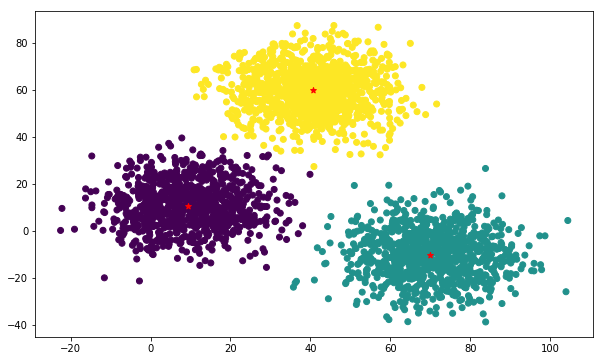

In [33]:
c,cluster = kmeans(3,0,X)

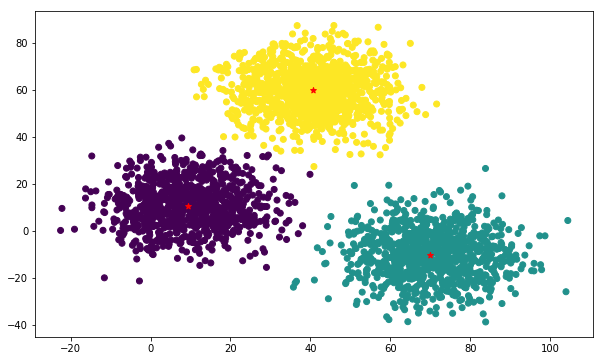

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(v1,v2,c=cluster.flatten())
c_x = [c[i][0] for i in range(k)]
c_y = [c[i][1] for i in range(k)]
plt.scatter(c_x,c_y,marker='*',color='r')